# Getting the outlines of text

1. draw text as an image
2. Use image processing to trace the edges of the letters.


In [14]:
    from matplotlib.pyplot import *
    from toolz.curried.operator import *
    from toolz.curried import *
    from io import BytesIO
    import pandas as pd
    import numpy as np
    import skimage.morphology, skimage.measure, skimage.io
    from IPython.utils.capture import capture_output

## Use the image below as the demonstration

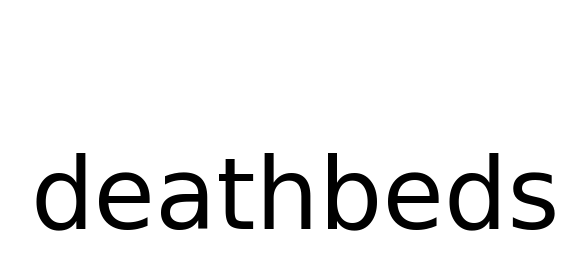

In [15]:
    fig, ax = subplots()

    ax.text(0, 0, 'deathbeds', fontsize=100)
    ax.set_axis_off()
    with BytesIO() as image:
        fig.savefig(image, format='png')
        image = skimage.io.imread(image, flatten=True)

## Label the image

In [16]:
    labelled = skimage.morphology.label(image)

* find the edges of each labeled contour.

In [17]:
    outlines = pipe(
        labelled, np.ravel, np.unique, map(partial(skimage.measure.find_contours, labelled)),
        concat, map(pd.DataFrame), list
    )

* plot the outlines over top of the labelled image.

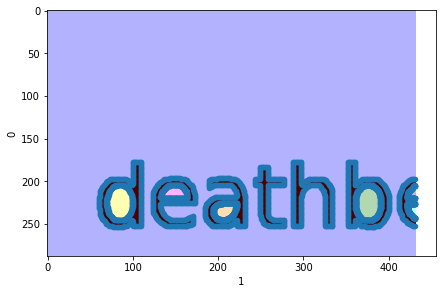

In [18]:
    with capture_output(display=False):
        skimage.io.imshow(skimage.color.label2rgb(labelled, image))

    for frame in outlines:
        ax = frame.plot.scatter(1, 0, ax=gca())
    axis('image');

Make the edges shapely objects.

In [19]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

In [20]:
polygons = pipe(
    outlines, map(compose(Polygon, map(
        compose(tuple, reversed)), attrgetter('values'))), list)

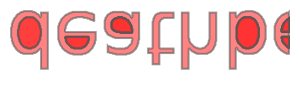

In [22]:
MultiPolygon(polygons)

In [23]:
    import disqus